In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('eda_data.csv')
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'Job state', 'same state', 'age', 'Python', 'R Studio', 'Spark', 'AWS',
       'excel', 'job_simplified', 'seniority', 'competitor count', 'desc_len'],
      dtype='object')

In [16]:
#choose relevant columns

df_model = df[['Rating','Size','Type of ownership','Industry','Sector','Revenue','competitor count','hourly','Job state','same state','Python','AWS','excel','seniority','desc_len','avg_salary']]


In [19]:
#get dummy data
df_dum = pd.get_dummies(df_model)
#train test split(train, test and validate)
#multiple linear regression

In [20]:
df_dum

,Rating,competitor count,hourly,same state,Python,AWS,excel,desc_len,avg_salary,Size_-1,...,Job state_SC,Job state_TN,Job state_TX,Job state_UT,Job state_VA,Job state_WA,Job state_WI,seniority_junior,seniority_na,seniority_senior
0,3.8,0,0,0,1,0,1,2536,72.0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.4,0,0,0,1,0,0,4783,87.5,0,...,0,0,0,0,0,0,0,0,1,0
2,4.8,0,0,1,1,0,1,3461,85.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3.8,3,0,1,1,0,0,3883,76.5,0,...,0,0,0,0,0,1,0,0,1,0
4,2.9,3,0,1,1,0,1,2728,114.5,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,3,0,0,0,1,0,6162,84.5,0,...,0,0,0,0,0,0,0,0,0,1
738,4.4,3,0,0,1,1,0,6130,102.5,0,...,0,1,0,0,0,0,0,0,0,1
739,2.6,0,0,1,0,0,1,3078,73.5,0,...,0,0,0,0,0,0,0,0,1,0
740,3.2,0,0,0,0,0,1,1642,127.5,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
#train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary',axis=1)
y = df_dum.avg_salary

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#linear regression model using sklearn


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

In [29]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error',cv=3)

array([-21.78149315, -22.90878429, -25.74861597])

In [32]:
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error',cv=3))

-23.479631137755693

In [33]:
from sklearn.linear_model import Lasso 

In [85]:
lm_l=Lasso(0.13)

In [36]:
np.mean(cross_val_score(lm_l, X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3) )

-23.587932061742332

In [51]:
alpha = []

In [52]:
error = []

In [53]:
for i in range(1,100):
    lm_l = Lasso(alpha = (i/100))
    alpha.append(i/100)
    error.append(np.mean(cross_val_score(lm_l, X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3) ))

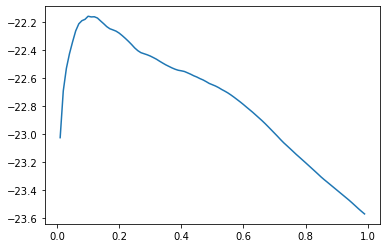

In [54]:
plt.plot(alpha,error)

In [55]:
err = tuple(zip(alpha,error))

In [56]:
df_err = pd.DataFrame(err,columns=['alpha','error'])

In [57]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
9,0.1,-22.160572


In [58]:
#random forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor()

In [96]:
np.mean(cross_val_score(rf,X_train, y_train,scoring = 'neg_mean_absolute_error',cv=3)) 

-17.360204968466387

In [66]:
#tuning using Gridsearch -- will give the model with best perfomance

In [67]:
from sklearn.model_selection import GridSearchCV

In [72]:
gs = GridSearchCV(rf,parameters,scoring = 'neg_mean_absolute_error',cv = 3)

In [80]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':(1.0,'sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)



GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': (1.0, 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [81]:
gs.best_score_


-17.296974931207163

In [82]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', n_estimators=240)

In [87]:
#test ensembles
lm_l.fit(X_train,y_train)

Lasso(alpha=0.13)

In [88]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)





23.254628634770615

In [90]:
mean_absolute_error(y_test,tpred_lml)

24.58877688818538

In [91]:
mean_absolute_error(y_test,tpred_rf)

14.761381431767337

In [92]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

17.961218519437903

In [94]:
#tuned random forest works best -- results within 14K dollars

In [97]:
tpred_lm

array([103.54291623,  48.5       , 128.08253409, 104.75860799,
       163.69466158, 126.33140046, 136.71932845,  33.76447528,
        89.20106746,  95.12778067, 100.26948301, 109.33342667,
       118.64306264, 140.14327163,  20.53054224, 147.41669681,
        88.72856788,  70.5530963 , 108.47012351,  91.24288374,
       118.54518066, 109.34067311, 136.2314004 , 134.81072691,
       172.27720935, 109.86809181,  94.13438442, 110.91183311,
        83.52245248, 112.92160352,  71.57946549,  60.42382964,
       143.64679953, 117.73448348,  91.56343061,  67.8586291 ,
        81.54763242, 105.41592927,  67.23004245, 114.70552895,
       138.97234496, 111.65797467,  85.2906676 , 101.1024801 ,
       154.13640605,  80.40915103, 154.61594288, 114.71757619,
       144.21746582,  78.09966712, 122.65891349, 118.60761824,
       107.5793768 ,  85.07958419,  92.06118426, 124.19664421,
        85.2906676 ,  93.48468512, 138.6137006 , 137.22034043,
       107.0791612 , 103.78964643, 134.72511106, 137.73

In [98]:
tpred_lml

array([105.24906202,  87.04490375, 123.88826654, 116.525598  ,
       156.71405702, 122.57977378, 132.40846781,  57.6640256 ,
        86.18407881, 105.07324312, 102.59197236, 113.47269016,
       114.38030986, 131.82389583,  38.48033745, 137.03062407,
        87.44357416,  92.2014749 , 100.27258097,  84.24978908,
       119.27449601, 108.32893542, 139.12269559, 121.69981353,
       170.48837842, 111.64165818,  95.66483071, 117.92029628,
        81.83930986, 104.20639722,  87.00238213,  70.75644405,
       144.44558363,  95.245149  ,  89.25403652,  86.26438271,
        75.85532041,  98.28487235,  92.43583897, 107.35948976,
       126.50042863, 122.42381107, 106.48174771, 103.93861539,
       154.76456541,  82.00508683, 144.33298933, 114.29048201,
       133.66370057,  93.55323287, 115.89764853, 116.66020777,
       108.81888228,  85.30854273,  96.8039361 , 115.82402626,
       106.48174771,  91.86412701, 126.54434475, 134.31796961,
       106.65893614, 103.15822927, 128.0854443 , 120.70

In [100]:
tpred_rf

array([115.03125   ,  52.28541667, 152.5625    , 120.09791667,
       162.92916667, 101.275     , 133.71666667,  70.13333333,
       101.5875    ,  73.14166667, 145.05625   ,  92.18958333,
       107.34583333, 113.55833333,  60.35      , 139.21041667,
        95.10104167,  71.87916667, 101.40833333, 107.17291667,
       113.92916667, 146.47916667, 150.23958333, 109.70416667,
       151.26666667, 106.18125   ,  90.17708333, 137.22291667,
       104.90208333,  97.34583333, 102.40416667,  53.80416667,
       126.825     , 116.81041667, 105.39166667,  82.87291667,
        80.94375   , 112.23958333,  66.5375    , 114.22083333,
       208.16041667, 119.84791667,  90.60625   ,  79.31979167,
       149.11458333,  78.50208333, 134.46875   , 110.62708333,
       125.65833333, 102.44791667, 119.        ,  87.67708333,
        76.10208333,  86.40416667,  94.82708333, 106.60833333,
        90.60625   ,  75.76145833, 243.28125   , 136.95833333,
       113.77708333,  90.85833333, 104.52916667, 139.76

In [113]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [114]:
file_name = 'model_file.p'

In [115]:
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [133]:
model.predict(np.array(list(X_test.iloc[10,:])).reshape(1,-1))[0]



145.05625